# Lab: Regression

## Group
Enter the next Python cell to add information about who you’re working with within your lab section:

In [1]:
partner1_name = "Rachael"
partner1_netid = "rgu6"
partner1_major = "stat"
 
partner2_name = "Meg"
partner2_netid = "mli224"
partner2_major = "stat+cs"
 
partner3_name = "Abhi"
partner3_netid = "athanvi2"
partner3_major = "stat+cs"


## Getting Help
Remember, there are a lot of ways to get help if you find yourself stuck:

1. In your lab section, you can ask your TA or CAs.
2. Post your question in the course Discord.
3. Office Hours:
  - In-person office hours **every Monday, Tuesday, Thursday, and Friday** from 4:00 PM - 6:00 PM in Siebel Center for Design (SCD) Rm. 0060
  - Zoom office hours **every Wednesday** from 5:00 PM - 6:00 PM and **every Thursday** from 9:00 PM - 11:00 PM (see the course website for links).

In this lab, you will:

- Do basic linear regression diagnostics.
- Create simple and multiple linear regression models.
- Interpret your models.

As you go through the lab:

- Make sure to run every cell with Python code and observe the output.
- Complete all puzzles and submit this lab before Monday evening at 11:59 PM.

# Setup


At the beginning of this lab, make sure you:
1. Make sure the `MLB.csv` data set is in **your working directory**. If not, download it from your personal GitHub repository.
2. Import the following libraries:
- `pandas` as `pd`
- `matplotlib.pyplot` as `plt`
- `seaborn` as `sns`
- `from sklearn.linear_model import LinearRegression`
- `import scipy.stats`
- `from scipy import stats`
3. Read the date sets into a data frame using `pd.read.csv()`

**If you do NOT have `seaborn`/`sklearn` installed, please run the following lines:
- **PC Only**
  - `py -m pip install seaborn`
  - `py -m pip install scikit-learn`
- **MacOS Only**
  - `python3 -m pip install seaborn`
  - `python3 -m pip install scikit-learn`

In [2]:
#Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats
from scipy import stats

# Intro

Linear regression is a useful tool in statistics. The purpose of it is to study how one or more predictors influence a response. We do this by fitting a line as close as possible to as many points as possible. The most common method, and the one that will be used in this lab, will be the Ordinary Least Squares Regression Method (OLS). This method tries to fit a line that minimizes the squared distance to each point in the data set. This lab will walk you through the process of creating a regression model and some basic analysis.
In this lab, we will analyze some data from Major League Baseball. We will look at the relationship (if there is any) between a team’s season win total (W) against a team’s [Earned Run Average](https://library.fangraphs.com/pitching/era/) (ERA) and [Wins Above Replacement](https://library.fangraphs.com/misc/war/) (WAR).

# Puzzle 1: Exploratory Data Analysis
Exploratory data analysis is the first step when working with linear regression. Before you can begin making regression models, you have to check that making a linear model is a good idea for your data. First, let’s import the data and make some summaries.

## Read the CSV File
In the following cell, read the `MLB.csv` file.

In [3]:
MLB = pd.read_csv("MLB.csv")
MLB

,Unnamed: 0,Season,Team,W,L,SV,IP,ERA,FIP,WAR
0,2,2015,STL,100,62,62,1464.2,2.94,3.48,20.6
1,3,2018,HOU,103,59,46,1455.0,3.11,3.23,28.6
2,4,2016,CHC,103,58,38,1459.2,3.15,3.77,18.8
3,5,2015,PIT,98,64,54,1489.2,3.23,3.36,19.5
4,6,2017,CLE,102,60,37,1440.2,3.30,3.33,30.4
...,...,...,...,...,...,...,...,...,...,...
145,147,2019,KCR,59,103,37,1425.0,5.20,4.90,7.9
146,148,2019,DET,47,114,31,1433.0,5.26,4.84,11.6
147,149,2017,DET,64,98,32,1420.1,5.36,4.73,11.5
148,150,2019,COL,71,91,28,1448.2,5.58,5.23,6.3


In [4]:
#TEST CASE
## == TEST CASES for Data ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(len(MLB) == 150), "The dataframe does not appear to have correct dataset loaded."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Part 1: Numerical Summary

Use the `.describe()` function to print out summary information your data.

In [5]:
description = MLB.describe()
description

,Unnamed: 0,Season,W,L,SV,IP,ERA,FIP,WAR
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000
mean,76.500000,2017.000000,80.973333,80.973333,41.140000,1445.677333,4.23500,4.234933,14.330667
std,43.445368,1.418951,12.675054,12.628904,7.530725,13.224459,0.53391,0.437348,5.476612
min,2.000000,2015.000000,47.000000,54.000000,25.000000,1412.200000,2.94000,3.230000,1.000000
25%,39.250000,2016.000000,71.000000,71.250000,36.000000,1437.125000,3.82000,3.970000,10.025000
50%,76.500000,2017.000000,81.000000,81.000000,41.000000,1443.550000,4.18000,4.220000,14.150000
75%,113.750000,2018.000000,91.000000,91.000000,46.000000,1454.550000,4.63000,4.525000,18.475000
max,151.000000,2019.000000,108.000000,115.000000,62.000000,1489.200000,5.67000,5.560000,30.400000


In [6]:
## == TEST CASES for description ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(len(description)==8), "Your description does not appear to be correct. Please make sure you used the correct function."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


The numerical summary above gives us a basic understanding of how our data looks. However, that does not mean you should skim over it. The numeric summary will be the quickest way to know if there is something unusual about the variables. If you had looked at the number of innings pitched by a team, the minimum value is 1,412, and the maximum value is 1,489. The low variation with 150 observations (30 teams over 5 seasons) should put up a red flag in the eyes of a statistician. The variable will be either crucial in the model or completely useless. If you are not familiar with baseball, IP will be practically useless because of how low the correlation (about 0.5) between wins is.

## Part 2: Graphical Summaries

Now we are going to do graphical summaries of the variables we want to explore. Using graphical summaries will help us visualize the variable we want to potentially use in the regression models. Histograms will show us the distribution of the random variable, while scatter plots will show us general trends and the correlation between two variables.

## Part 2a: Histograms
Create histograms for the variables listed below.

Wins(W)

<AxesSubplot:>

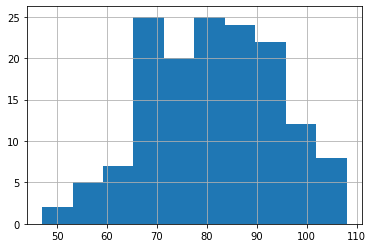

In [7]:
#Code for Histogram
MLB["W"].hist()

Earned Run Average (ERA)

<AxesSubplot:>

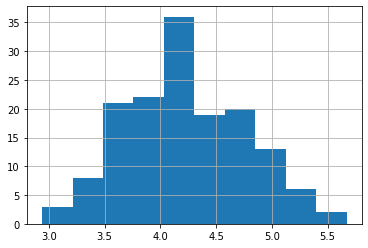

In [8]:
#Code for Histogram
MLB["ERA"].hist()

Wins Above Replacement (WAR)

<AxesSubplot:>

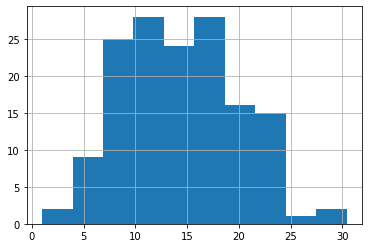

In [9]:
#Code for Histogram
MLB["WAR"].hist()

## Part 2b: Scatter Plots

Create scatter plots for the variables listed below.
The variables are listed as “Y-Axis Variable” vs. “X-Axis Variable”.
 
Wins (W) vs. Earned Run Average (ERA)

<AxesSubplot:xlabel='ERA', ylabel='W'>

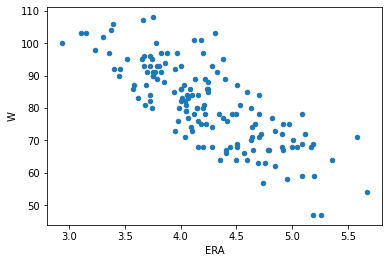

In [10]:
#Code for Scatter Plot
MLB.plot.scatter(x="ERA",y="W")

Wins (W) vs. Wins Above Replacement (WAR)

<AxesSubplot:xlabel='WAR', ylabel='W'>

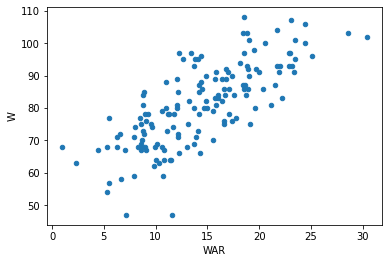

In [11]:
#Code for Scatter Plot
MLB.plot.scatter(x="WAR",y="W")

## ❓Part 2c: Group Discussion❓

1. To create a linear regression model, our variables must have a normal or approximately normal distribution. Are the histograms of the three variables normal or approximately normal? 

The histograms of the three variables are approximately normal because the histogram takes the shape of a normal curve. 

2. Look at the two scatter plots. Is there a correlation between Wins and ERA? What about Wins and WAR? If so, are the correlations positive or negative?

There is a negative correlation between Wins and ERA. For Wins and WAR, there is a positive correlation. 

3. What do the correlations between Wins versus ERA and Wins versus WAR tell us? Use **NON-STATISTICAL** terminology to explain.

A negative correlation means that when ERA increases, the number of wins decreases. A positive correlation means that when WAR increases, the number of wins also increases.

## Part 2d: Correlation matrix

Now that you have made predictions about the correlation based on the scatter plots, let’s see the actual values. Create a correlation matrix.  Think about what you can see between the pairs. You will notice that the diagonals of the correlation matrix are all 1. This is because what the matrix is saying is the correlation between the variable and itself is 1.

In [12]:
#Code for Correlation Matrix
cor = MLB.corr()
cor

,Unnamed: 0,Season,W,L,SV,IP,ERA,FIP,WAR
Unnamed: 0,1.000000,0.258563,-0.769663,0.769858,-0.592083,-0.514336,0.980132,0.891618,-0.745739
Season,0.258563,1.000000,0.001493,0.001498,-0.160786,0.078542,0.279497,0.340558,-0.000173
W,-0.769663,0.001493,1.000000,-0.999680,0.633547,0.501172,-0.780843,-0.678682,0.753243
L,0.769858,0.001498,-0.999680,1.000000,-0.632396,-0.496348,0.781417,0.679728,-0.754419
SV,-0.592083,-0.160786,0.633547,-0.632396,1.000000,0.348657,-0.620801,-0.574121,0.514135
IP,-0.514336,0.078542,0.501172,-0.496348,0.348657,1.000000,-0.506675,-0.471604,0.385179
ERA,0.980132,0.279497,-0.780843,0.781417,-0.620801,-0.506675,1.000000,0.904599,-0.742999
FIP,0.891618,0.340558,-0.678682,0.679728,-0.574121,-0.471604,0.904599,1.000000,-0.811927
WAR,-0.745739,-0.000173,0.753243,-0.754419,0.514135,0.385179,-0.742999,-0.811927,1.000000


In [13]:
#TEST CASE
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(cor["Unnamed: 0"]["Unnamed: 0"] == cor['Season']["Season"] == cor['W']["W"] == cor['L']["L"] == cor['SV']["SV"] == cor['IP']["IP"] == cor['ERA']["ERA"] == cor['FIP']["FIP"] == cor['WAR']["WAR"]),"Are you sure the correlations are correct?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


# Puzzle 2: Simple Linear Regression

Checking the descriptive statistics is useful and gives us a basic idea of the data. If we want to use the data to make predictions, we can use a simple linear regression model.
The equation for a simple linear regression model is y = $\beta_0$ + $\beta_1$ * x.

## Part 1: Models
In the following cells, write the Python code to create a simple linear regression model to predict the average number of wins for an MLB team using ERA and WAR as the independent variable “x”. You want your code to print out the slope (b1) and y-intercept (b0).

In [21]:
#Creation of Model using ERA as the x-variable to predict wins.

model = LinearRegression()
model = model.fit(MLB[["ERA"]], MLB["W"])
b0_ERA = model.intercept_
b1_ERA = model.coef_[0]

print("The intercept (ß0) = " + str(b0_ERA) + ".")
print("The slope (ß1) = " + str(b1_ERA) + ".")

The intercept (ß0) = 159.4785641865975.
The slope (ß1) = -18.53724459345081.


❓ **Write out the model formula in the cell below replacing $\beta_0$ and $\beta_1$ with the slope and y-intercept that you found.** ❓

W = 159.48 - 18.54(ERA)

In [22]:
#Creation of Model using WAR as the x-varaible to predict wins.

model = LinearRegression()
model = model.fit(MLB[["WAR"]], MLB["W"])
b0_WAR = model.intercept_
b1_WAR = model.coef_[0]

print("The intercept (ß0) = " + str(b0_WAR) + ".")
print("The slope (ß1) = " + str(b1_WAR) + ".")

The intercept (ß0) = 55.99062817707242.
The slope (ß1) = 1.7433037650907777.


❓ **Write out the model formula in the cell below replacing $\beta_0$ and $\beta_1$ with the slope and y-intercept that you found.** ❓

W = 55.99 + 1.74(WAR)

## Part 2: Significance

You have now made two simple linear regression models. However, we need to check to see if the coefficient estimates ($\hat{\beta_0}$, $\hat{\beta_1}$) are significant. In other words, are the intercept and the slope significant in predicting the total amount of wins in a season? To do this, we can run a hypothesis test on the coefficients. We have done z tests and t tests and this will be very similar!  We will not make you do the detailed outline as in the previous lab, but it may help you to look back at it. The null hypothesis and alternative hypothesis are listed below!

$H_0$: $\beta_i$ = 0

$H_a$: $\beta_i$ $\neq$ 0

To conduct the test, you will first have to find the Test Statistic. We will use t, which will have a slightly different formula than we are used to! To do this, you simply use the following formula.

### $t_{TS}$ = $\frac{\hat{\beta_i}}{SE{\hat{(\beta_i)}}}$


Since calculating the Standard Errors, $SE{\hat{(\beta_i)}}$ , for all four coefficients will be too time consuming, we will give them to you below.  Find the p-values for the slope and intercept in both models. You'll want to use `n - 2` degrees of freedom in your p-value calculations. 

- ERA

  -$SE{\hat{(\beta_0)}}$ = 5.204
  
  -$SE{\hat{(\beta_1)}}$ = 1.219
  

- WAR

  -$SE{\hat{(\beta_0)}}$ = 1.9189

  -$SE{\hat{(\beta_1)}}$ = 0.1251

In [27]:
#t-Test Statistic and p-value calculations for ERA to predict wins.
ts_b0_ERA = b0_ERA / 5.204
ts_b1_ERA = b1_ERA / 1.219

df = len(MLB["ERA"]) - 2

p_value_b0_ERA = (scipy.stats.t.sf(abs(ts_b0_ERA), df=df)) * 2
p_value_b1_ERA = (scipy.stats.t.sf(abs(ts_b1_ERA), df=df)) * 2

print("The t-Test Statistic for ß0 in W~ERA is " + str(ts_b0_ERA) + ".")
print("The t-Test Statistic for ß1 in W~ERA is " + str(ts_b1_ERA) + ".")
print("The p-value for ß0 in W~ERA is " + str(p_value_b0_ERA) + ".")
print("The p-value for ß1 in W~ERA is " + str(p_value_b1_ERA) + ".")

The t-Test Statistic for ß0 in W~ERA is 30.645381281052558.
The t-Test Statistic for ß1 in W~ERA is -15.206927476169655.
The p-value for ß0 in W~ERA is 5.776406818103569e-66.
The p-value for ß1 in W~ERA is 4.791617945767242e-32.


In [28]:
#TEST CASE
import math
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(math.isclose(ts_b0_ERA,30.645381281052558)), "Your t-Test Statistic for ß0 in W~ERA doesn't seem correct"
assert(math.isclose(ts_b1_ERA,-15.20692748)), "Your t-Test Statistic for ß1 in W~ERA doesn't seem correct"
assert(math.isclose(p_value_b0_ERA,5.776406818103569e-66)), "Your p-value for ß0 in W~ERA doesn't seem correct"
assert(math.isclose(p_value_b1_ERA,4.79161795e-32)), "Your p-value for ß1 in W~ERA doesn't seem correct"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


In [29]:
#t-Test Statistic and p-value calculations for WAR to predict wins.

ts_b0_WAR = b0_WAR / 1.9189
ts_b1_WAR = b1_WAR / 0.1251

df = len(MLB["WAR"]) - 2

p_value_b0_WAR = (scipy.stats.t.sf(abs(ts_b0_WAR), df=df)) * 2
p_value_b1_WAR = (scipy.stats.t.sf(abs(ts_b1_WAR), df=df)) * 2

print("The t-Test Statistic for ß0 in W~WAR is " + str(ts_b0_WAR) + ".")
print("The t-Test Statistic for ß1 in W~WAR is " + str(ts_b1_WAR) + ".")
print("The p-value for ß0 in W~ERA is " + str(p_value_b0_WAR) + ".")
print("The p-value for ß1 in W~ERA is " + str(p_value_b1_WAR) + ".")

The t-Test Statistic for ß0 in W~WAR is 29.178502359201847.
The t-Test Statistic for ß1 in W~WAR is 13.935281895210055.
The p-value for ß0 in W~ERA is 2.9479146729524473e-63.
The p-value for ß1 in W~ERA is 1.0007034392215591e-28.


In [30]:
#TEST CASE
import math
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(math.isclose(ts_b0_WAR,29.178502359201847)), "Your t-Test Statistic for ß0 in W~WAR doesn't seem correct"
assert(math.isclose(ts_b1_WAR,13.9352819)), "Your t-Test Statistic for ß1 in W~WAR doesn't seem correct"
assert(math.isclose(p_value_b0_WAR,2.9479146729524473e-63)), "Your p-value for ß0 in W~WAR doesn't seem correct"
assert(math.isclose(p_value_b1_WAR,1.00070344e-28)), "Your p-value for ß1 in W~WAR doesn't seem correct"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## ❓Part 3: Individual Reflection❓

Using $\alpha$ = 0.05 for all of the tests, interpret the results of your hypothesis tests. From both models, which coefficient estimates are significant and which ones are not significant? Explain why. Make sure you talk about all **four** coefficient estimates.

All four coefficient estimates are not significant.

## Part 4: Visual Fun
Now that you have made your regression models, let’s see how it looks when put on a scatter plot of the original data. Create a scatter plot with the simple linear regression model for both models.

Hint: Use `sns.regplot()`


<AxesSubplot:xlabel='ERA', ylabel='W'>

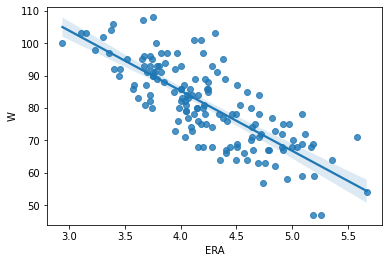

In [33]:
#Scatter Plot of W~ERA with SLR
sns.regplot(x=MLB[["ERA"]],y=MLB["W"])

<AxesSubplot:xlabel='WAR', ylabel='W'>

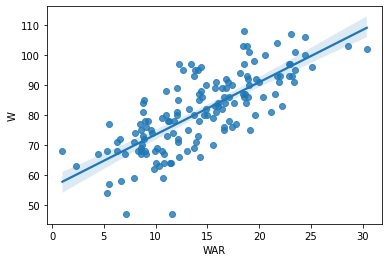

In [34]:
#Scatter Plot of W~WAR with SLR
sns.regplot(x=MLB[["WAR"]],y=MLB["W"])

# Puzzle 3: Multiple Linear Regression

Now say we want to use both ERA and WAR in a linear regression model at the same time. This is called a multiple linear regression model. The equation for the multiple linear regression model is:

## y = $\beta_0$ + $\beta_1$ * $x_1$ + $\beta_2$ * $x_2$ 

## Part 1: Model
In the following cells, write the Python code to create a multiple linear regression model to predict the average number of wins for an MLB team using both ERA and WAR as the predictors.

In [36]:
#Creation of Model using ERA+WAR to predict wins

model = LinearRegression()
model.fit(MLB[["ERA"] + ["WAR"]], MLB["W"])
MLR_b0 = model.intercept_
MLR_bi = model.coef_

print("The intercept (ß0) = " + str(MLR_b0) + ".")
print("The coefficient estimates (ß1 & ß2) are " + str(MLR_bi) + ".")

The intercept (ß0) = 117.80127404374933.
The coefficient estimates (ß1 & ß2) are [-11.72203031   0.8942262 ].


❓**Write out the model formula in the cell below replacing the coefficient estimates $\beta_0$, $\beta_1$, and $\beta_2$.** ❓

W = 117.8 - 11.72(ERA) + 0.89(WAR)

## Part 2: Residuals
When you made the scatter plots with the simple linear regression models on them, notice how the regression lines do not perfectly predict the data. The distance that each point is from the regression line is called the residual or prediction error. Unless we have a perfect correlation, we will have some errors. The regression models you created earlier are done using a method that minimizes the squares of the residuals called the Ordinary Least Squares (OLS) method.

**Residuals are the difference between the observed value of y and the predicted value $\hat{y}$.**

In the following cell, write the Python code to calculate the residuals.

In [37]:
#Code for computing the residuals.
#residuls  = predicted wins - actual wins

MLB["predicted"] = 117.8 - (11.72 * MLB["ERA"]) + (0.89 * MLB["WAR"])
MLB["residul"] = MLB["predicted"] - MLB["predicted"]

In [38]:
#TEST CASE
## == TEST CASES for Residuals ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

#assert(math.isclose(MLB["residuals"].sum(), 6.395884621840902e-14)), "The residuals might not be correct. Please check again!"
assert(math.isclose(MLR_b0, 117.80127404374933)), "Your ß0 intercept seems to be incorrect."
assert(round(MLR_bi[0],2)== -11.72), "The ß1 coefficent estimate doesn't seem correct"
assert(round(MLR_bi[1],2)== 0.89), "The ß2 coefficent estimate doesn't seem correct"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Part 3: Evaluation
Using Python, evaluate ERA = 3.21 and WAR = 25.24 in your multiple linear regression model. In other words, use your model to make a prediction!  Please use the `round` function to round your estimate to the closest whole number because `W` (wins) is a *discrete* variable.

**Hint:** Use the equation at the start of this puzzle and solve for y.

In [39]:
#Code for Calculation
win_prediction = 117.8 - (11.72 * 3.21) + (0.89 * 25.24)
win_prediction = round(win_prediction)

print("The predicted win total with a team ERA of 3.21 and a team WAR of 25.24 is " + str(win_prediction) + " wins.")


The predicted win total with a team ERA of 3.21 and a team WAR of 25.24 is 103 wins.


In [40]:
#TEST CASE
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(math.isclose(win_prediction, 103)), "Your win_prediction calculation seems to be incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## ❓Group Discussion and Individual Reflection❓

If we input ERA = 3.21 into its simple linear regression model, we get the estimated average win total for a team is about 100 wins. If we input WAR = 25.24 into its simple linear regression model, we also get the estimated average win total for a team to be about 100 wins. When you input both into the multiple linear regression model, we get a different estimated average win total. Why do you think this is? This question is a bit beyond the scope of the course, so you will be given points just for giving a logical answer.


I think this is because by inputting multiple variables, you will get a number that is closer to the actual value. Each variable affects the predicted value. 

# Submit Your Work

You are now done with the last lab of the semester. Congratulations on surviving.
 
You need to do two more things before you can go back to studying for finals:
1. Save your work. To do this, create a **notebook checkpoint** by using the menu within the notebook. Got to  **File -> Save All**.
2. After you have saved it, exit this notebook and return to the Data Science Discovery page for the Git commands to submit this lab.

# Good luck with your finals!